# Прогнозирование оттока клиентов в сети фитнес-центров

## Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;

    2) предложить меры по снижению оттока;

    3) определить другие особенности взаимодействия с клиентами.


## Набор данных
**`churn`** - факт оттока в текущем месяце (целевая переменная);

**`gender`** - пол;

**`near_location`** - проживание или работа в районе, где находится фитнес-центр;

**`partner`** - сотрудник компании-партёра клуба;

**`promo_friends`** - факт первоначальной записи в рамках акции "приведи друга";

**`phone`** - наличие контактного телефона;

**`age`** - возраст;

**`lifetime`** - время с первого обращения в фитнесс-центр;

**`contract_period`** - длительность текущего действующего аобнемента (месяц, 3 месяца, 6 месяцев, 1 год);

**`month_to_end_contract`** - срок до окончания текущего действующего абонемента (в месяцах);

**`group_visits`** - факт посещения групповых занятий;

**`avg_class_frequency_total`** - средняя частота посещений в неделю за все время с начала действия абонемента;

**`avg_class_frequency_current_month`** - средняя частота посещений в неделю за предыдущий месяц;

**`avg_additional_charges_total`** - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Оглавление:<a id="step100"></a>

### [Шаг 1. Загрузка и изучение данных](#step1)

### [Шаг 2. Исследовательский анализ данных (EDA)](#step2)
* [Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения;](#step2.1)
* [Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;](#step2.2)
* [Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);](#step2.3)
* [Постройм матрицу корреляций.](#step2.4)

### [Шаг 3. Построение модели прогнозирования оттока клиентов](#step3)
* [Разделение данных на обучающую и валидационную выборку функцией **`train_test_split()`**](#step3.1)
* [Период данных, минимальная и максимальная дата ](#step3.2)
* [Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Выбор лучшей модели на основании метрик](#step3.3)


### [Шаг 4. Кластеризация клиентов](#step4)
* [Стандартизация данных](#step4.1)
* [Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков, дендрограмма.](#step4.2)
* [Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров примем n=5.](#step4.3)
* [Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить? Для каждого полученного кластера посчитаем долю оттока. Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#step4.4)
* [Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?](#step4.5)


### [Шаг 5. Выводы и базовые рекомендации по работе с клиентами](#step5)





# Шаг 1. Загрузка и изучение данных <a id="step1"></a>

In [1]:
#Загрузка библиотек
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
#Загрузка файла с данными
data=pd.read_csv('/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
#Проверка на дубли и пропуски в данных
print('Кол-во дублей в строках: {}\n'.format(data.duplicated().sum()))
print(data.info())
print()
print('Пропуски в данных: \n', data.isna().sum()) 
data.head(5)

Кол-во дублей в строках: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


> * Данные загружены, пропусков и дублей не обнаружено

# Шаг 2. Исследовательский анализ данных (EDA) <a id="step2"></a>

## Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения; <a id="step2.1"></a>

In [4]:
#приведём названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()


In [5]:
print('Описание признаков и целевой переменной:')
print(data.describe().T)

Описание признаков и целевой переменной:
                                    count        mean        std        min  \
gender                             4000.0    0.510250   0.499957   0.000000   
near_location                      4000.0    0.845250   0.361711   0.000000   
partner                            4000.0    0.486750   0.499887   0.000000   
promo_friends                      4000.0    0.308500   0.461932   0.000000   
phone                              4000.0    0.903500   0.295313   0.000000   
contract_period                    4000.0    4.681250   4.549706   1.000000   
group_visits                       4000.0    0.412250   0.492301   0.000000   
age                                4000.0   29.184250   3.258367  18.000000   
avg_additional_charges_total       4000.0  146.943728  96.355602   0.148205   
month_to_end_contract              4000.0    4.322750   4.191297   1.000000   
lifetime                           4000.0    3.724750   3.749267   0.000000   
avg_class_f

> **Вывод:**
* Распределение по полу примерно одинаково (51/49)
* Большинство клиентов проживает или работает в районе с с фитнес-центром
* Почти половина клиентов являются сотрудниками компаний-партнёров клуба
* Около 30% клиентов пришли по программе "Приведи друга"
* Известны мобильные номера примерно 90% клиентов
* Средняя длительность абонемента клиентов - 4.7 месяцев
* Около 41% клиентов посещают групповые занятия
* Средний возраст клиентов 29 лет
* Средние доп. расходы на клиента - 147
* Средний срок до окончания договора - 4.3 месяцев
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* Средняя частота посещений за все время - 1.87 раз в неделю
* Средняя частота посещений за последний месяц - 1.76 раз в неделю
* **Доля оттока** - 27%

## Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался; <a id="step2.2"></a>

In [6]:
print('Отток:')
print(data[data['churn']==1].describe().T)
print('\nОставшиеся клиенты:')
print(data[data['churn']==0].describe().T)

Отток:
                                    count        mean        std        min  \
gender                             1061.0    0.510839   0.500118   0.000000   
near_location                      1061.0    0.768143   0.422217   0.000000   
partner                            1061.0    0.355325   0.478837   0.000000   
promo_friends                      1061.0    0.183789   0.387495   0.000000   
phone                              1061.0    0.902922   0.296204   0.000000   
contract_period                    1061.0    1.728558   2.132371   1.000000   
group_visits                       1061.0    0.268615   0.443448   0.000000   
age                                1061.0   26.989632   2.895163  18.000000   
avg_additional_charges_total       1061.0  115.082899  77.696419   0.148205   
month_to_end_contract              1061.0    1.662582   1.964593   1.000000   
lifetime                           1061.0    0.990575   1.110799   0.000000   
avg_class_frequency_total          1061.0    

> **Вывод на основе отличий признаков у клиентов, попавших в отток и оставшихся:**
* Распределение по полу не отличается
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность договора полне логично больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

## Постройм столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток); <a id="step2.3"></a>

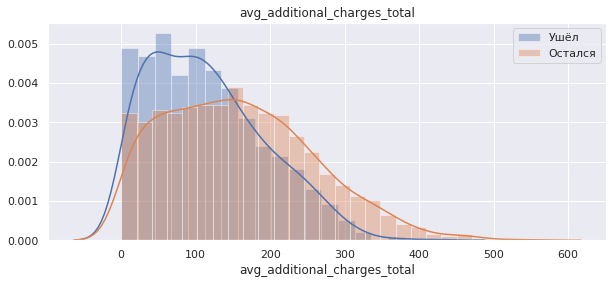

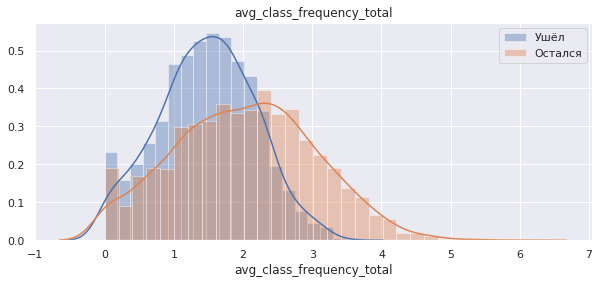

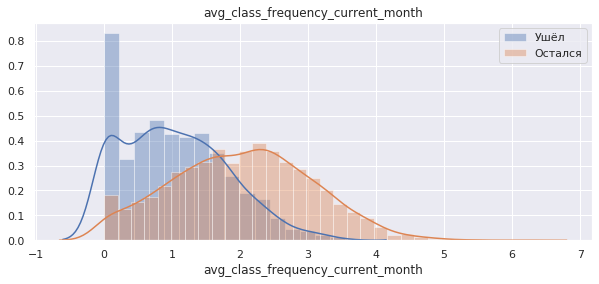

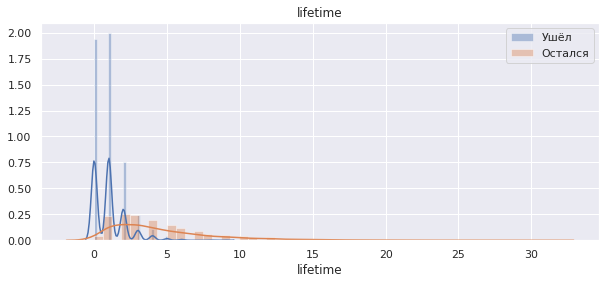

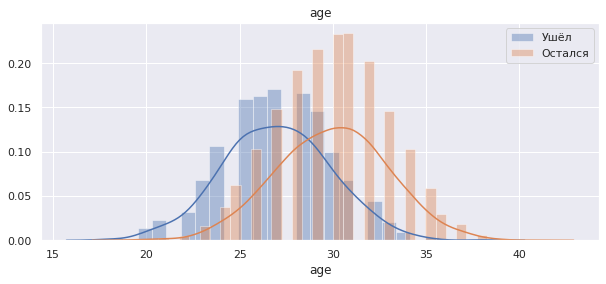

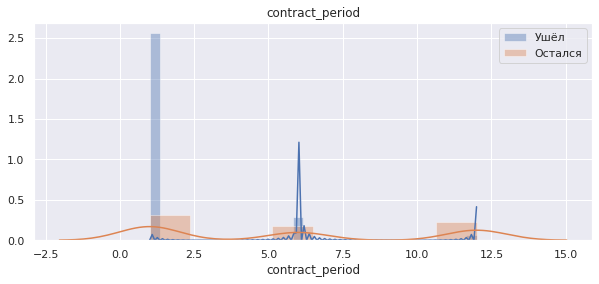

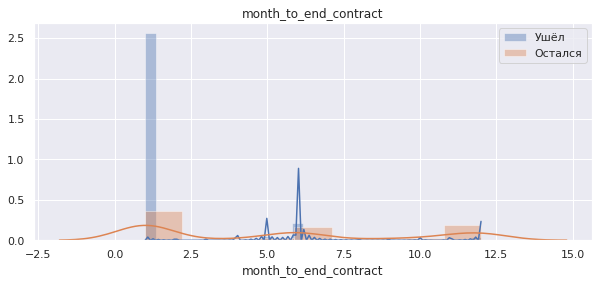

In [7]:
left = data[data['churn']==1]
stay = data[data['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
  plt.figure(figsize=(10,4)) 
  plt.title(column)
  sns.distplot(left[column])
  sns.distplot(stay[column])
  plt.legend(['Ушёл', 'Остался'])
  plt.show()

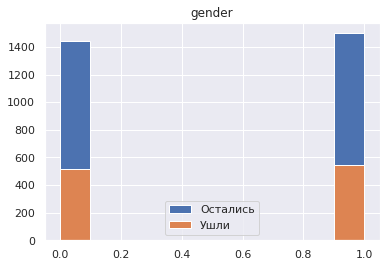

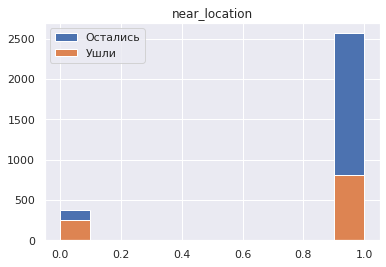

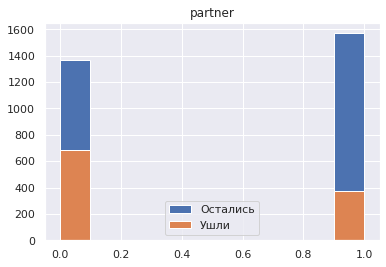

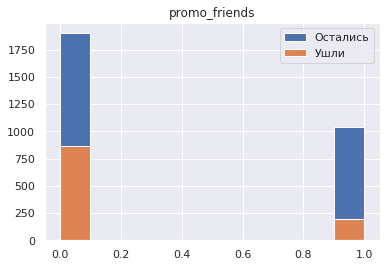

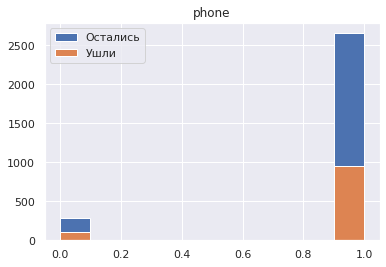

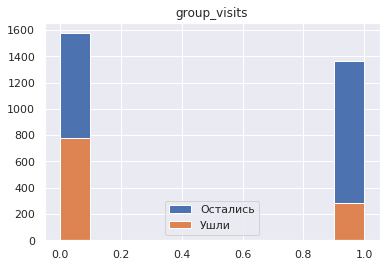

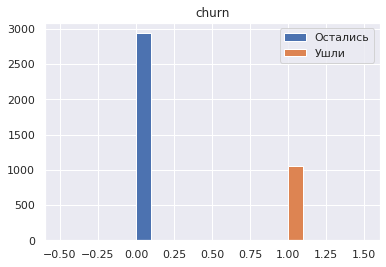

In [8]:
for column in data.columns:
  if column not in distplot_columns:
    data.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Остались', 'Ушли'])
    plt.show()

## Построим матрицу корреляций <a id="step2.4"></a>

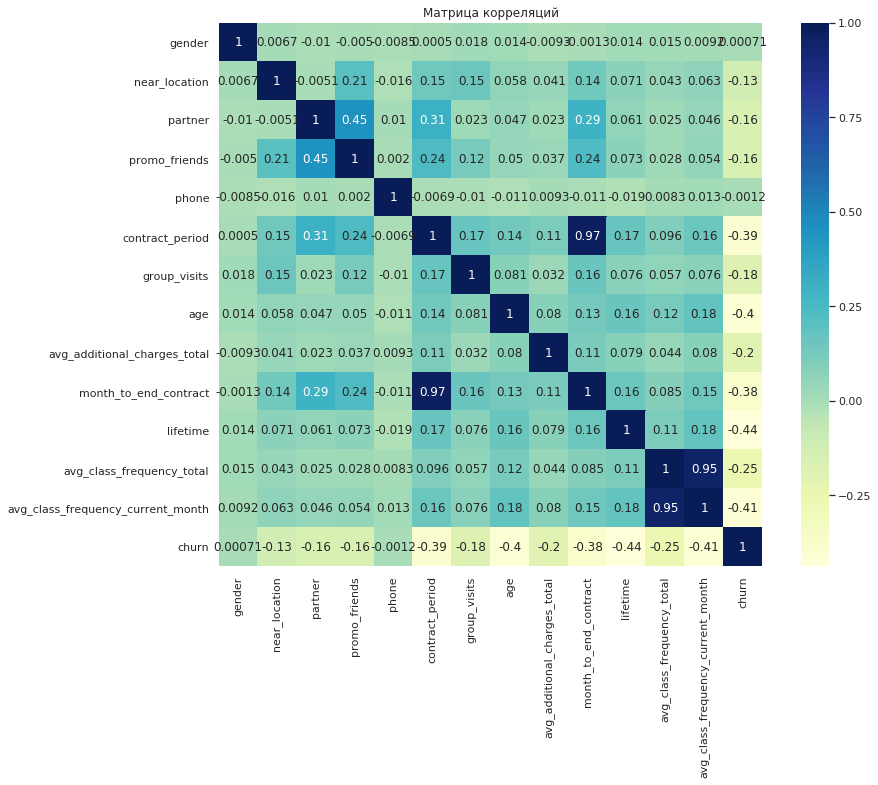

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(data = data.corr(), annot=True, square=True, cmap='YlGnBu')
plt.title('Матрица корреляций')
plt.show()

> **Вывод:**
* Явной зависимости факта оттока от признаков не выявлено
* Имеются два мультиколлинеарных признака - **`contract_period` и `month_to_end_contact`**

# Шаг 3. Построение модели прогнозирования оттока клиентов <a id="step3"></a>

## Разделение данных на обучающую и валидационную выборку функцией train_test_split() <a id="step3.1"></a>

In [10]:
#Разделим данные на обучающую и валидационную выборки
X = data.drop(['churn'], axis = 1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



## Обучение модели на train-выборке двумя способами:
### - логистической регрессией (Logistic regression),
### - случайным лесом (Random Forest). <a id="step3.2"></a>

In [11]:

#Logistic regression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]


#Random Forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]




/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Выбор лучшей модели на основании метрик <a id="step3.3"></a>

In [12]:
print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

Метрики для модели логистической регрессии:
accuracy_score: 0.925
precision_score: 0.8631578947368421
recall_score:0.8282828282828283


In [13]:
print('\nМетрики для модели случайного леса:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))


Метрики для модели случайного леса:
accuracy_score: 0.91625
precision_score: 0.8393782383419689
recall_score:0.8181818181818182


> **Вывод:**
* Метрики чуть выше в модели логистической регрессии;
* Модель логистической регрессии показала себя лучше.

# Шаг 4. Кластеризация клиентов  <a id="step4"></a>

## Стандартизация данных <a id="step4.1"></a>

In [14]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

## Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков, дендрограмма.  <a id="step4.2"></a>

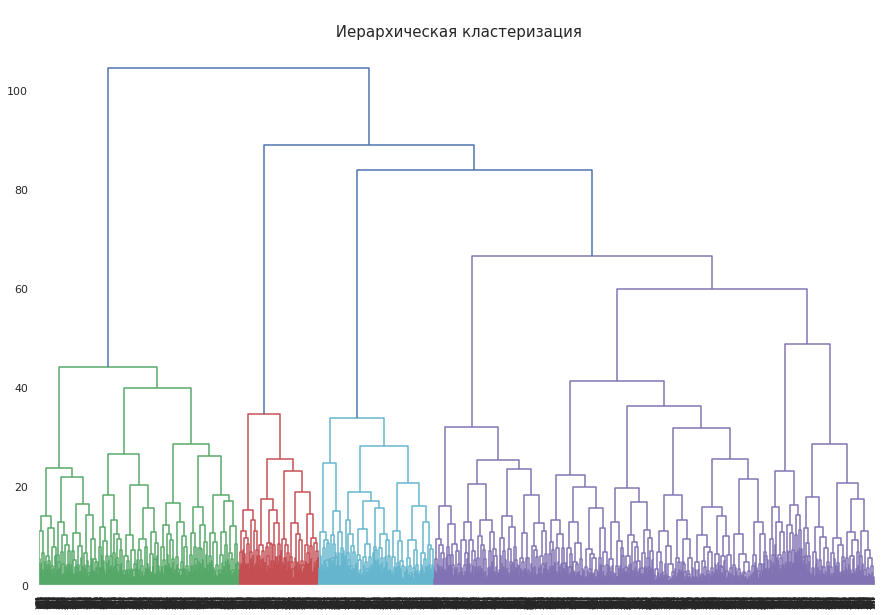

In [15]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()


## Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров примем n=5. <a id="step4.3"></a>

In [16]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
data['cluster_km'] = labels

## Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить? Для каждого полученного кластера посчитаем долю оттока. Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны? <a id="step4.4"></a>

In [17]:
data.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


> **Описание кластеров:**
* **Кластер 0**
  * **Отток - 52% - самый высокий**
  * Живут или работают недалеко от фитнес-центра
  * В основном обладатели недолгосрочных абонементов на 1-3 месяца
  * Наименьшее кол-во посещений за всё время и в последний месяц
* **Кластер 1**
  * Отток - 7%
  * Живут или работают недалеко от фитнес-центра
  * **Чаще всех посещают клуб - 2.81 раз в неделю**
  * Договора НЕ на длительный срок - в  среднем 2.8 месяцев
* **Кластер 2**
  * **Отток - 3% - самый низкий**
  * Живут или работают недалеко от фитнес-центра
  * Преобладают сотрудники компаний-партнеров - 78%
  * Заключают договора **на длительный срок - 12 месяцев**
  * Чаще всех посещают групповые занятия - 54%
  * Чаще всех пришли по промо акции
* **Кластер 3**
  * Отток - 44%
  * Похожи на кластер 0, но живут или **работают в другом районе**
  * Низкий % - 7% пришли по промо акции
  * Реже всех посещают групповые занятия
* **Кластер 4**
  * Отток - 26%
  * Живут или работают недалеко от фитнес-центра
  * **Нет мобильного номера**
  * В среднем 4.5 месяцев контракты

## Построим распределения признаков для кластеров.  <a id="step4.5"></a>

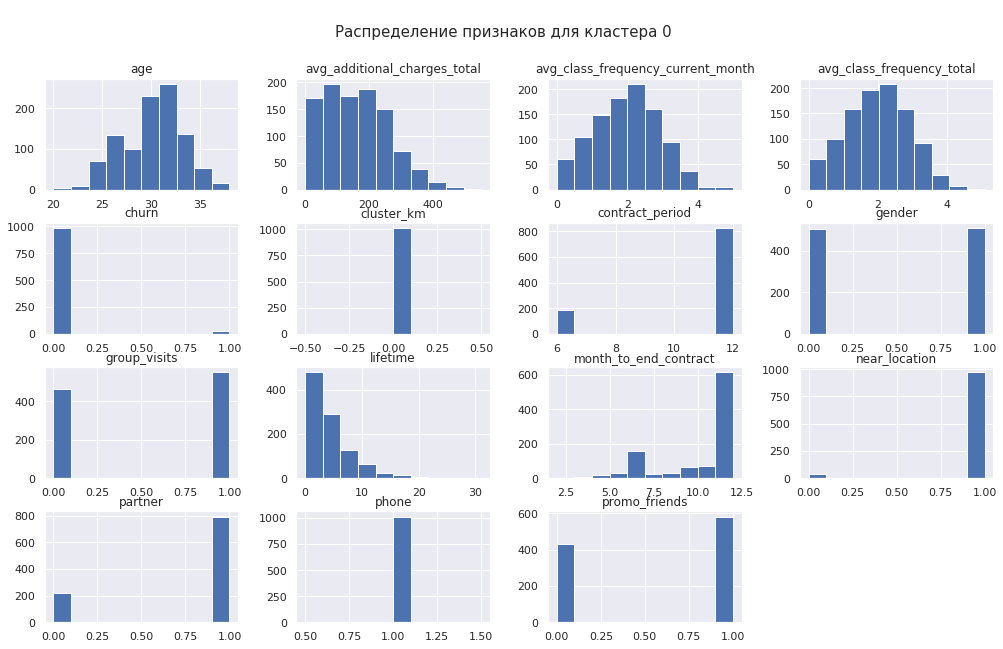

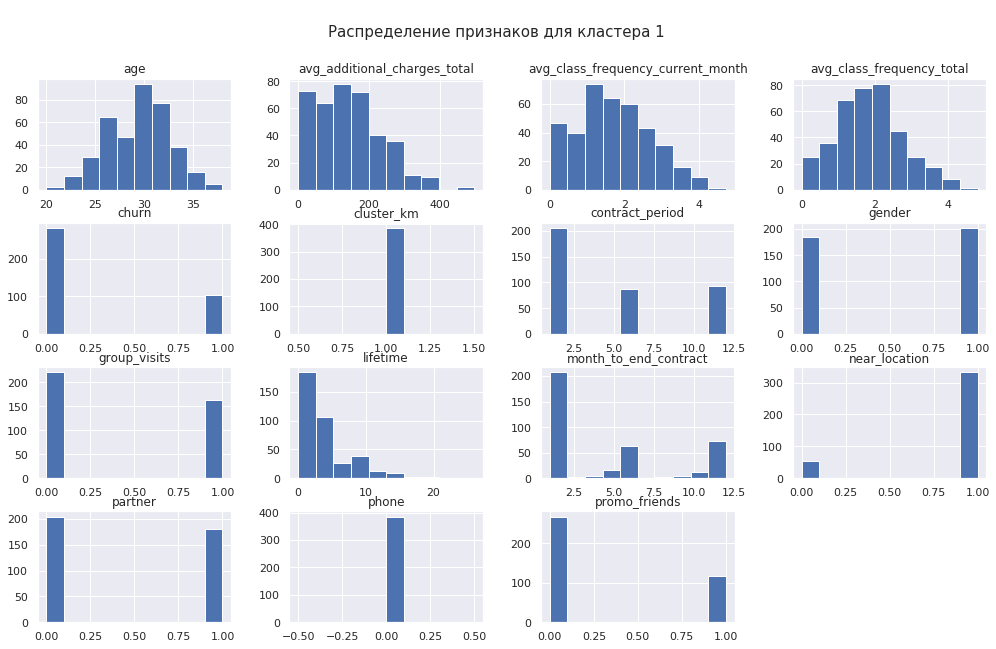

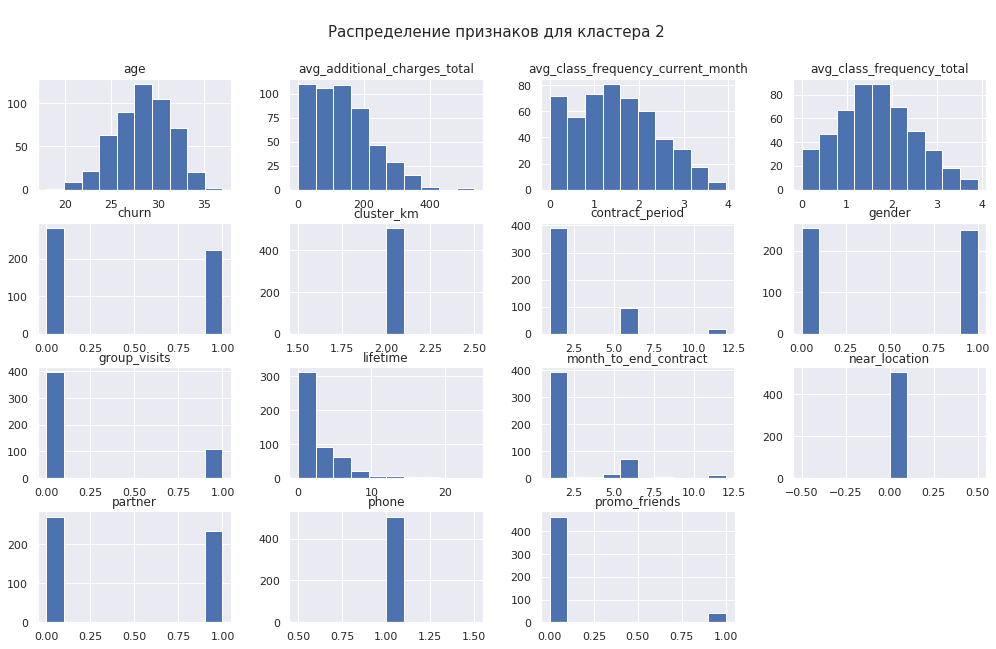

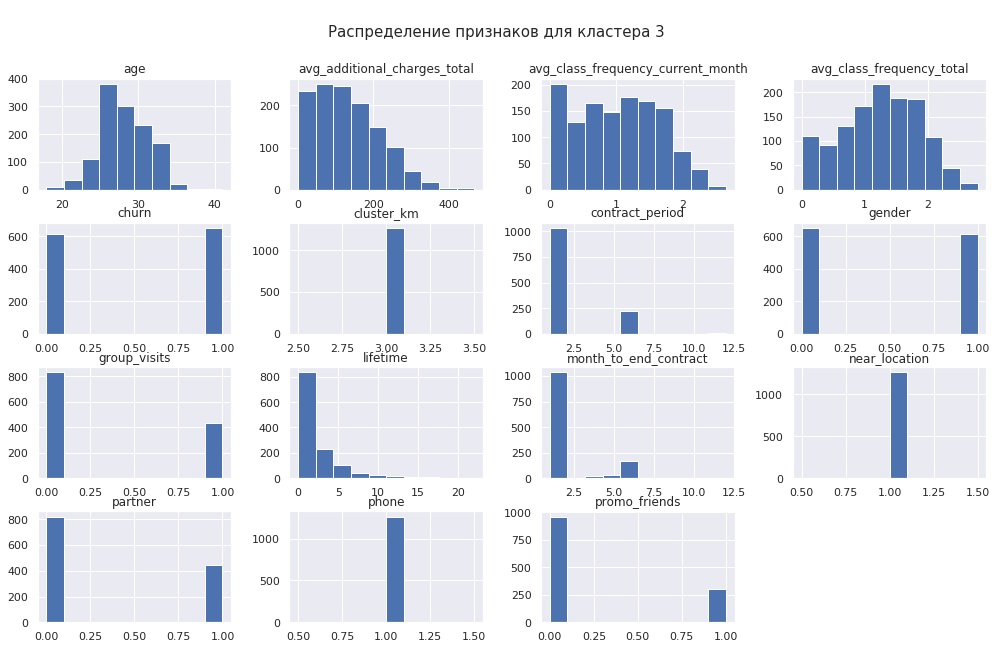

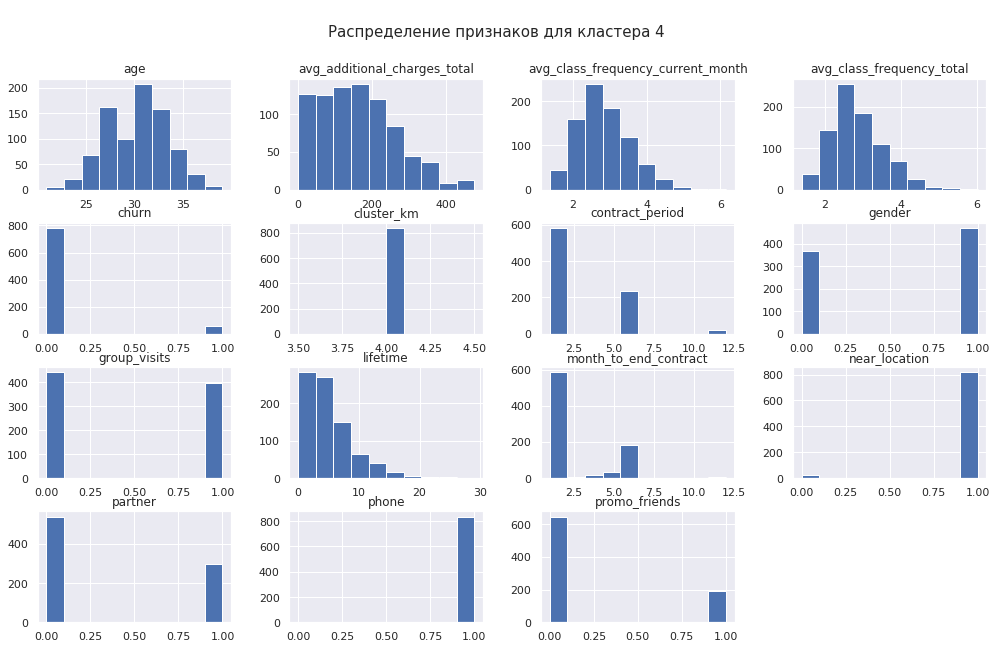

In [18]:
for value in [0, 1, 2, 3, 4]:
  data[data['cluster_km']==value].hist(figsize=(17,10))
  plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

# Выводы и базовые рекомендации по работе с клиентами <a id="step5"></a>

## Сформулируем основные выводы и предложим рекомендации для стратегии взаимодействия с пользователями и их удержания. (3-4 важных принципа)

#### На основе имеющихся данных мы построили прогнозную модель логистической регрессии с хорошей точностью. Благодаря ей мы можем прогнозировать вероятность оттока по каждому клиенту.
#### Явной зависимости факта оттока от конкретного признака из доступных -  не обнаружено.

**Выводы по имеющимся данным:**
* Распределение по полу примерно одинаково
* Большинство клиентов (85%) живет или работает рядом с фитнес-клубом
* Примерно половина клиентов являются сотрудниками партнерских организаций
* Около 30% клиентов пришли по программе "Приведи друга"
* Известны мобильные номера примерно 90% клиентов
* Средняя длительность абонементов клиентов - 4.6 месяцев
* Около 40% клиентов посещают групповые занятия
* Средний возраст клиентов 29 лет
* Средние дополнительные расходы на клиента - 146
* Средний срок до окончания договора - 4.3 месяцев
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* Средняя частота посещений за все время - 1.87 раз в неделю
* Средняя частота посещений за последний месяц - 1.76 раз в неделю
* **Доля оттока - 27%**

**Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:**
* Распределение по полу не отличается
* Живущие или работающие ближе к клубу клиенты реже попадают в отток, что вполне логично
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб, чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность договора полне логично больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

#### Мы приняли за количество кластеров - 5
* Как выяснилось, большинство клиентов живет или работает неподалеку от фитнес-центра.
* **Кластер 0**
  * **Отток - 52% - самый высокий**
  * Живут или работают недалеко от фитнес-центра
  * В основном обладатели недолгосрочных абонементов на 1-3 месяца
  * Наименьшее кол-во посещений за всё время и в последний месяц
* **Кластер 1**
  * Отток - 7%
  * Живут или работают недалеко от фитнес-центра
  * **Чаще всех посещают клуб - 2.81 раз в неделю**
  * Договора НЕ на длительный срок - в  среднем 2.8 месяцев
* **Кластер 2**
  * **Отток - 3% - самый низкий**
  * Живут или работают недалеко от фитнес-центра
  * Преобладают сотрудники компаний-партнеров - 78%
  * Заключают договора **на длительный срок - 12 месяцев**
  * Чаще всех посещают групповые занятия - 54%
  * Чаще всех пришли по промо акции
* **Кластер 3**
  * Отток - 44%
  * Похожи на кластер 0, но живут или **работают в другом районе**
   * Реже всех посещают групповые занятия
* **Кластер 4**
  * Отток - 26%
  * Живут или работают недалеко от фитнес-центра
  * **Нет мобильного номера**
  * В среднем 4.5 месяцев контракты

#### Исходя из полученных кластеров и их характеристик можно дать следующие рекомендации:
* Сделать ставку на долгосрочные абонементы (12 мес) и активно предлагать клиентам, с менее длительными абонементами - более длительные, возможно и по промо цене, в долгосрочной перспективе это может принести дополнительную прибыли и увеличение числа лояльных клиентов.
* Увеличить количество и разнообразие групповых занятий, они отлично "заходят" для самых целевых клиентов.
* Возможно увеличить бонусы по программе лояльности "Приведи друга", это поможет снизить процент оттока, заниматься вместе со знакомыми - комфортнее и меньше шансов, что клиент забросит.
* При составлении плана работы с клиентами - учитывать их кластеризацию и в случае "неблагоприятного" кластера и выскокой вероятности оттока - уделять особое внимание таким клиентам заранее, не дожидаясь когда они уйдут.

